<a href="https://colab.research.google.com/github/ykitaguchi77/PreProcess_Image_colab/blob/master/Square_resize_multi_half.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Square_resize_multi_500pix

長方形を、長辺を一辺とした正方形にresizeし余白を黒く塗りつぶした上で、指定の大きさ（500pix）に縮小するスクリプト

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd
import csv
from random import randint
from time import sleep
import math

import glob
import random
from PIL import Image, ImageDraw
%matplotlib inline

#サポートパッチのインポート
from google.colab.patches import cv2_imshow
import cv2

plt.ion()   # interactive mode

#Google driveをマウント
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**フォルダ設定、パラメータ**

In [132]:
#元画像フォルダ
in_path1 = '/content/drive/MyDrive/Deep_learning/Olympia_dataset/dataset_500px'
in_path2 = '/content/drive/MyDrive/Deep_learning/Olympia_dataset/dataset_500px'

#保存先フォルダ
out_path1 = '/content/drive/MyDrive/Deep_learning/Olympia_dataset/dataset_500px_half'
out_path2 = '/content/drive/MyDrive/Deep_learning/Olympia_dataset/dataset_500px_half'

#image_size(square pixel)
im_size = 500

#モジュール群

In [133]:
def convert(in_path, out_path, processing_file):
    #処理時間の計測
    start = time.time()

    l=0
    for i in processing_file:      
          img = Image.open(in_path + '/' + i)
          img_new_R = img
          img_new_L = img
          
          img_R = half_paint_R(img_new_R, (0, 0, 0))
          img_R.save(out_path +'/R_'+ i)

          plt.imshow(np.asarray(img_new_L))
          plt.show()

          img_L = half_paint_L(img_new_L, (0, 0, 0))
          img_L.save(out_path +'/L_'+ i)

          print(out_path +'/'+ i)
          
          #切り取った画像を表示
          #plt.imshow(np.asarray(img_new))
          #plt.show()

    print('Process done!!')
    elapsed_time = time.time() - start
    print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

def half_paint_L(pil_img, background_color):
    width, height = pil_img.size
    draw = ImageDraw.Draw(pil_img)
    draw.line((0,0,500,500))
    return pil_img

def half_paint_R(pil_img, background_color):
    width, height = pil_img.size
    draw = ImageDraw.Draw(pil_img)
    draw.rectangle((0,0,width/2,height), fill=background_color)
    return pil_img

def showInfo(in_path):
    #処理するDirectoryの設定
    file = os.listdir(in_path)
    print('total images: '+str(len(file)))

    #ここにフォルダ番号を記載するとその枚数だけ処理される (ex. [0:999])
    #processing_file = file
    processing_file = file[0:1]
    print(processing_file)
    print('processing images: '+str(len(processing_file)))
    return processing_file


total images: 1016
['19.JPG']
processing images: 1


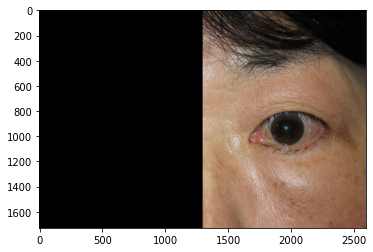

/content/drive/MyDrive/Deep_learning/Olympia_dataset/dataset_500px/19.JPG
Process done!!
elapsed_time:1.0628817081451416[sec]


'\n#元画像フォルダ\nin_path2 = in_path2\n\n#保存先フォルダ\nout_path2 = out_path2\nif not os.path.exists(out_path2):\n    os.makedirs(out_path2)\n\nprocessing_file = showInfo(in_path2)\nconvert(in_path2, out_path2, processing_file)\n'

In [134]:
#元画像フォルダ
in_path1 = in_path1

#保存先フォルダ
out_path1 = out_path1
if not os.path.exists(out_path1):
    os.makedirs(out_path1)

processing_file = showInfo(in_path1)
convert(in_path1, out_path1, processing_file)

"""
#元画像フォルダ
in_path2 = in_path2

#保存先フォルダ
out_path2 = out_path2
if not os.path.exists(out_path2):
    os.makedirs(out_path2)

processing_file = showInfo(in_path2)
convert(in_path2, out_path2, processing_file)
"""

#**フォルダを削除したいとき**


In [ ]:
import shutil

directory = 'ここにパスをコピー'

try:
    shutil.rmtree(directory)
except FileNotFoundError:
    pass